In [1]:
#Importing Libraries and loading data sets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')
sub = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')

In [2]:
#Shape and preview
print('Train set shape:', df.shape)
print('Test set shape:', test.shape)

Train set shape: (8693, 14)
Test set shape: (4277, 13)


In [3]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [4]:
#Extracting in information by getting data descriptions
df.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
#Numeric Data for training data set
numeric = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = df.select_dtypes(include = numeric)
df_num.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [7]:
#Numeric Data for test data set
numeric = ['int8','int16','int32','int64','float16','float32','float64']
df_num = test.select_dtypes(include = numeric)
df_num.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [8]:
##Categorical Data for train data set
df_cat = df.select_dtypes(include ='object')
df_cat.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent


In [9]:
#Categorical Data for test data set
df_cat = test.select_dtypes(include='object')
df_cat.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus


In [10]:
#Dropping Unimportant information
df = df.drop(['PassengerId', 'Cabin','Name'], axis = 'columns')
test = test.drop(['PassengerId','Cabin', 'Name'], axis = 'columns')

In [11]:
#Looking into missing values
null = pd.DataFrame(df.isna().sum(), columns= ['Null Values'])
null['% Missing Values'] = (df.isna().sum()/len(df)*100)
null = null[null['% Missing Values']>0]
null.style.background_gradient(cmap = 'viridis', low = 0.2,high = 0.1)

,Null Values,% Missing Values
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730
Spa,183,2.105142
VRDeck,188,2.162660


In [12]:
null_cat = null.select_dtypes(include = 'object')
null_cat.head(3)

""
HomePlanet
CryoSleep
Destination


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
# filling in null values for categorical  data
imp_mean_cat = SimpleImputer(strategy='most_frequent')
imp_mean_cat.fit(df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']])
df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']] = imp_mean_cat.transform(df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP']])

In [15]:
#filling in null values for numeric data
imp_mean_num = SimpleImputer(strategy = 'median')
imp_mean_num.fit(df[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa','VRDeck']])
df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = imp_mean_num.transform(df[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [16]:
#Checking to confirm null values are filled
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values


In [17]:
#Replicating the above procedures on the test data sets
null = pd.DataFrame(test.isnull().sum(), columns =['Null Value'])
null['% Missing Values'] = (test.isna().sum()/len(test)*100)
null = null[null['% Missing Values'] > 0]
null.style.background_gradient(cmap = 'viridis', low = 0.2, high = 0.1)

,Null Value,% Missing Values
HomePlanet,87,2.034136
CryoSleep,93,2.174421
Destination,92,2.151040
Age,91,2.127660
VIP,93,2.174421
RoomService,82,1.917232
FoodCourt,106,2.478373
ShoppingMall,98,2.291326
Spa,101,2.361468
VRDeck,80,1.870470


In [18]:
#Replicating the above procedures on the test data sets
imp_mean_cat = SimpleImputer(strategy='most_frequent')
imp_mean_cat.fit(test[['HomePlanet','CryoSleep','Destination','VIP']])
test[['HomePlanet','CryoSleep','Destination','VIP']] = imp_mean_cat.transform(test[['HomePlanet','CryoSleep','Destination','VIP']])

In [19]:
#Replicating the above procedures on the test data sets
imp_mean_num = SimpleImputer(strategy='median')
imp_mean_num.fit(test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = imp_mean_num.transform(test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])

In [20]:
#Replicating the above procedures on the test data sets
null = pd.DataFrame(test.isnull().sum(),columns = ['Null Values'])
null['% Missing Values'] = (test.isna().sum()/len(test)*100)
null = null[null['% Missing Values']>0]
null.style.background_gradient(cmap = 'viridis', low = 0.2, high =0.1)

,Null Values,% Missing Values


In [21]:
#Getting statistical summary of train numeric data sets
describe_num = df.describe(include =['float64','int64','float','int'])
describe_num.T.style.background_gradient(cmap ='viridis', low = 0.2, high = 0.1)

,count,mean,std,min,25%,50%,75%,max
Age,8693.000000,28.790291,14.341404,0.000000,20.000000,27.000000,37.000000,79.000000
RoomService,8693.000000,220.009318,660.519050,0.000000,0.000000,0.000000,41.000000,14327.000000
FoodCourt,8693.000000,448.434027,1595.790627,0.000000,0.000000,0.000000,61.000000,29813.000000
ShoppingMall,8693.000000,169.572300,598.007164,0.000000,0.000000,0.000000,22.000000,23492.000000
Spa,8693.000000,304.588865,1125.562559,0.000000,0.000000,0.000000,53.000000,22408.000000
VRDeck,8693.000000,298.261820,1134.126417,0.000000,0.000000,0.000000,40.000000,24133.000000


In [22]:
#Getting statistical summary of train categorical data sets
describe_cat = df.describe(include=['O'])
describe_cat.T.style.background_gradient(cmap ='viridis', low = 0.2, high =0.1)

,count,unique,top,freq
HomePlanet,8693,3,Earth,4803
CryoSleep,8693,2,False,5656
Destination,8693,3,TRAPPIST-1e,6097
VIP,8693,2,False,8494


In [23]:
#Getting statistical summary of test numeric data sets
describe_num =test.describe(include = ['float64','int64','float','int'])
describe_num.T.style.background_gradient(cmap='viridis', low = 0.2, high = 0.1)

,count,mean,std,min,25%,50%,75%,max
Age,4277.000000,28.601590,14.032629,0.000000,20.000000,26.000000,37.000000,79.000000
RoomService,4277.000000,215.062427,601.914503,0.000000,0.000000,0.000000,48.000000,11567.000000
FoodCourt,4277.000000,428.592238,1510.155974,0.000000,0.000000,0.000000,66.000000,25273.000000
ShoppingMall,4277.000000,173.233107,554.991776,0.000000,0.000000,0.000000,27.000000,8292.000000
Spa,4277.000000,295.895955,1104.872018,0.000000,0.000000,0.000000,43.000000,19844.000000
VRDeck,4277.000000,304.898293,1235.991811,0.000000,0.000000,0.000000,31.000000,22272.000000


In [24]:
#Getting statistical summary of test categorical data sets
describe_cat = test.describe(include =['O'])
describe_cat.T.style.background_gradient(cmap = 'viridis',low = 0.2, high = 0.1)

,count,unique,top,freq
HomePlanet,4277,3,Earth,2350
CryoSleep,4277,2,False,2733
Destination,4277,3,TRAPPIST-1e,3048
VIP,4277,2,False,4203


In [25]:
#importing seaborn library
import seaborn as sns

In [26]:
#fishing out correlation values for heatmap
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
RoomService,0.068629,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.127390,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.033148,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.120946,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,0.099590,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874
Transported,-0.074233,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000


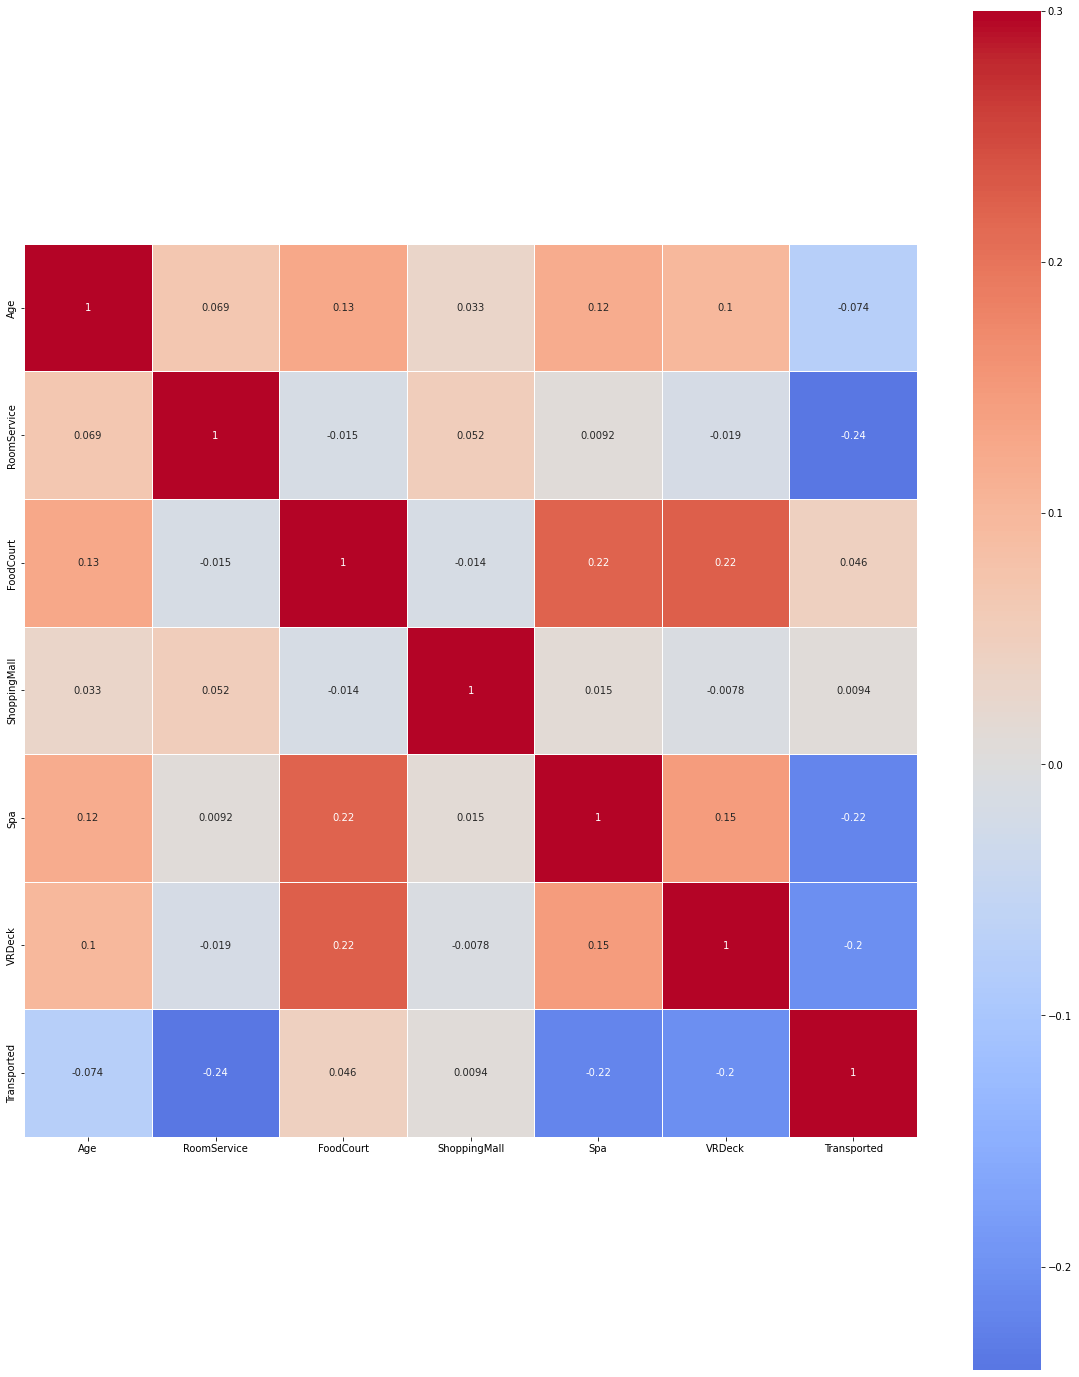

In [27]:
#Plotting heat map of train datasets where +1 indicates the highest positive correlation, 
#-1 indicates the highest negative correlation, and 0 indicates no correlation.
plt.figure(figsize =(20,25))
sns.heatmap(df.corr(), cmap = 'coolwarm', vmax =0.3, center =0, square =True, linewidth = 0.5, annot = True)
plt.show()

In [28]:
#fishing out correlation values for heatmap
test.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.062846,0.106020,0.037038,0.104157,0.102692
RoomService,0.062846,1.000000,-0.030386,0.061400,0.007010,-0.032575
FoodCourt,0.106020,-0.030386,1.000000,0.026025,0.236745,0.274970
ShoppingMall,0.037038,0.061400,0.026025,1.000000,0.004543,0.025116
Spa,0.104157,0.007010,0.236745,0.004543,1.000000,0.141331
VRDeck,0.102692,-0.032575,0.274970,0.025116,0.141331,1.000000


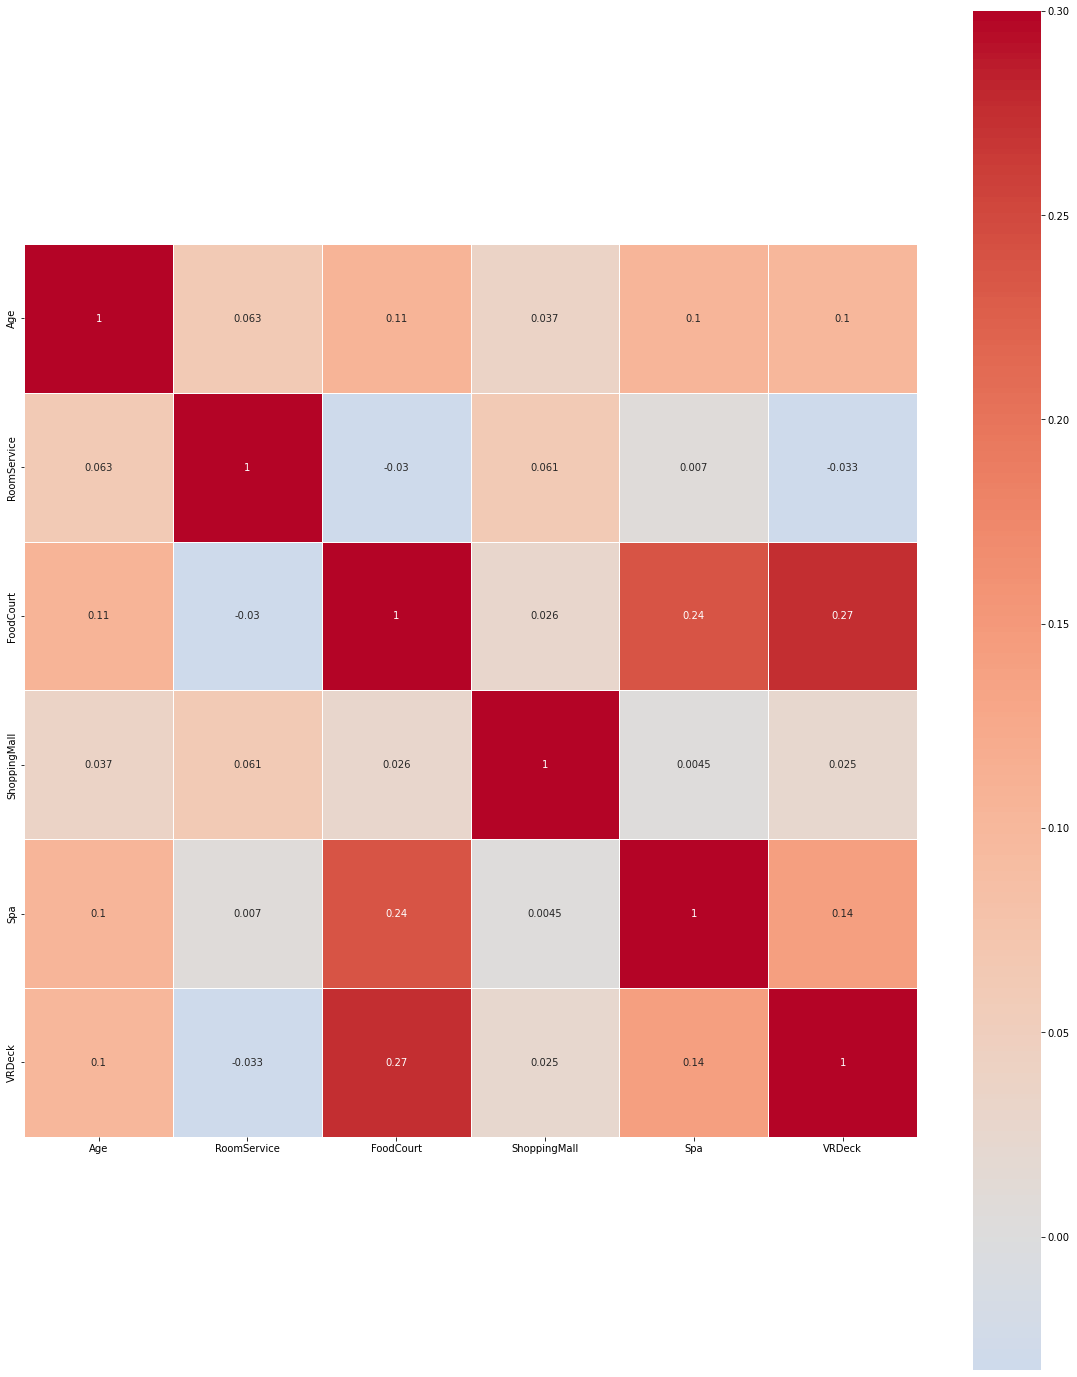

In [29]:
#Plotting heat map of train datasets where +1 indicates the highest positive correlation, 
#-1 indicates the highest negative correlation, and 0 indicates no correlation.
plt.figure(figsize = (20,25))
sns.heatmap(test.corr(), cmap = 'coolwarm', vmax =0.3, center = 0, square = True, linewidth = 0.5, annot = True)
plt.show()

In [30]:
#Transportation convertion to int
transported = df[df['Transported']==1]

In [31]:
not_transported = df[df['Transported']==0]

<AxesSubplot:xlabel='CryoSleep'>

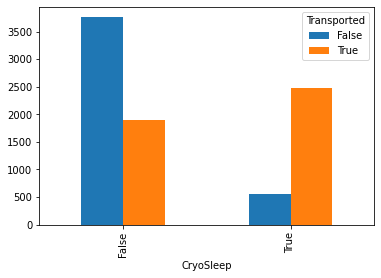

In [32]:
#How transportation is related to cryosleep
pd.crosstab(df['CryoSleep'],df['Transported']).plot(kind='bar')

<AxesSubplot:xlabel='Destination'>

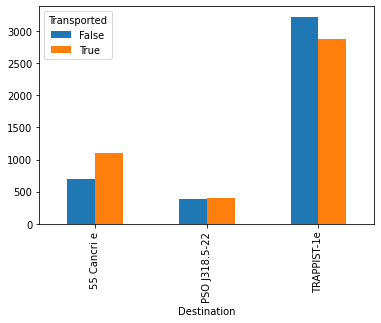

In [33]:
#How transportation is related to destination
pd.crosstab(df['Destination'], df['Transported']).plot(kind = 'bar')

<AxesSubplot:xlabel='HomePlanet'>

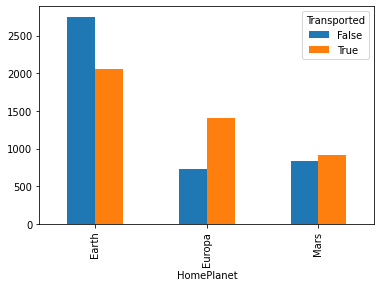

In [34]:
#How transportation is related to home planet
pd.crosstab(df['HomePlanet'], df['Transported']).plot(kind='bar')

<AxesSubplot:xlabel='VIP'>

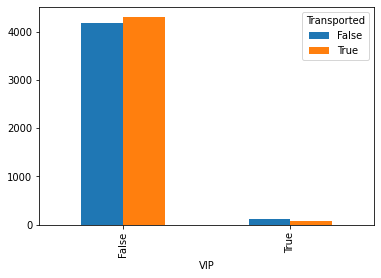

In [35]:
#How transportation is related to VIP
pd.crosstab(df['VIP'], df['Transported']).plot(kind='bar')

#VIP does not appear to be a useful feature; the target split is more or less equal.
#VIP feature wouldlikely be dropped to prevent overfit in our model

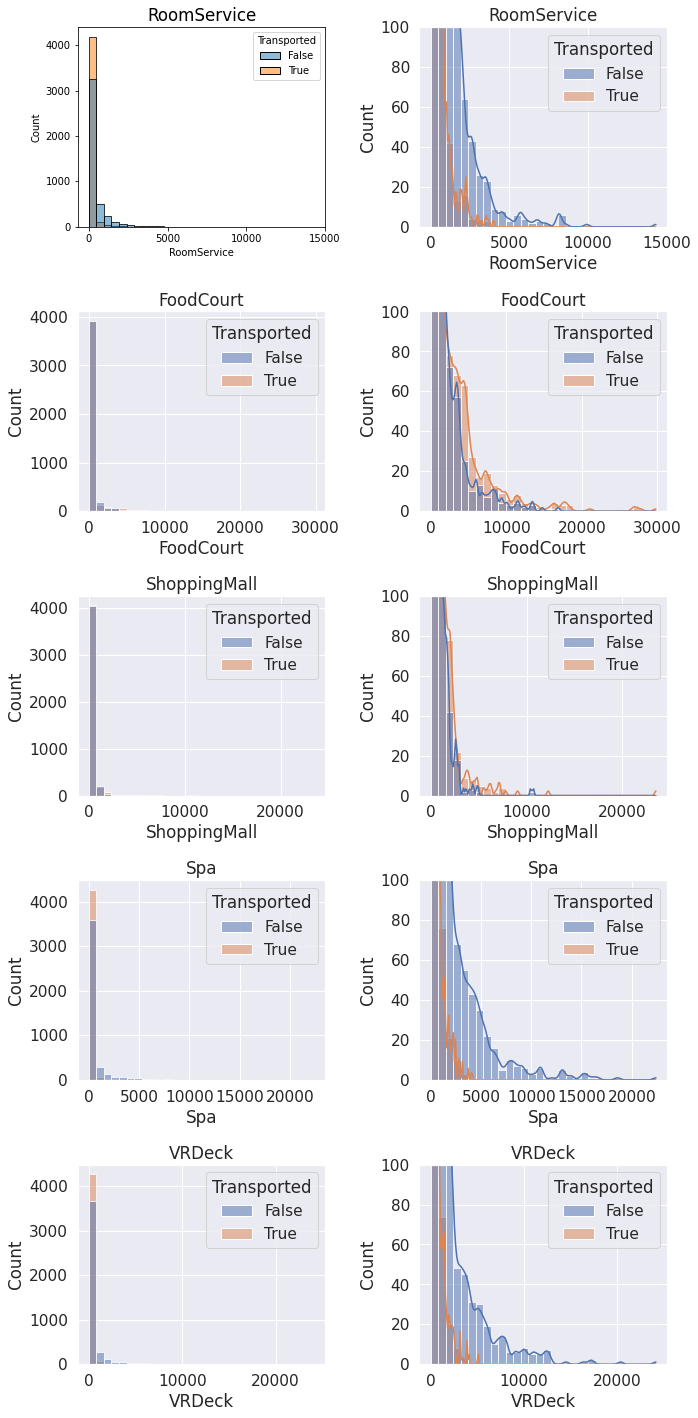

In [36]:
#Transportation relation to expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    sns.set(style='darkgrid', font_scale=1.4)
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    sns.set(style='darkgrid', font_scale=1.4)
    plt.ylim(0,100)
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

#It can be deduced that people who spent less or nothing were more likely to be transported

In [37]:
#Univariate Analysis: deriving useful inoformation from seperation boundary plots
df_transported = df.loc[df['Transported']==1]
df_not_transported = df.loc[df['Transported']==0]
df_not_transported

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
13,Earth,False,TRAPPIST-1e,48.0,False,719.0,1.0,65.0,0.0,24.0,False
15,Earth,False,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
8683,Earth,False,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,False
8686,Europa,False,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False


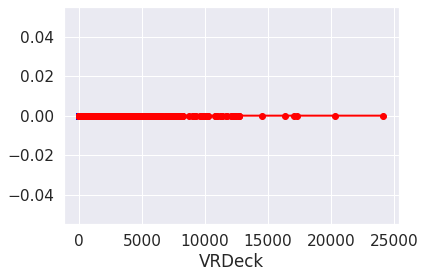

In [38]:
plt.plot(df_transported['VRDeck'], np.zeros_like(df_transported['VRDeck']), marker = 'x', color = 'blue')
plt.plot(df_not_transported['VRDeck'],np.zeros_like(df_not_transported['VRDeck']), marker = 'o', color = 'red')
plt.xlabel('VRDeck')
plt.show()

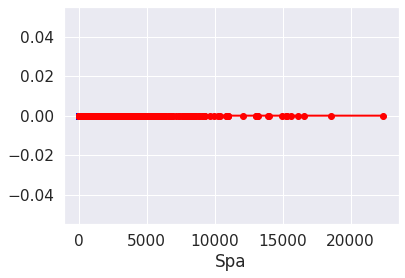

In [39]:
plt.plot(df_transported['Spa'], np.zeros_like(df_transported['Spa']), marker = 'x', color = 'blue')
plt.plot(df_not_transported['Spa'], np.zeros_like(df_not_transported['Spa']), marker = 'o', color = 'red')
plt.xlabel('Spa')
plt.show()

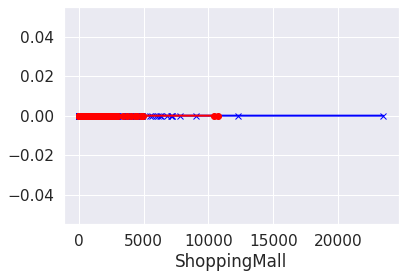

In [40]:
plt.plot(df_transported['ShoppingMall'], np.zeros_like(df_transported['ShoppingMall']), marker = 'x', color = 'blue')
plt.plot(df_not_transported['ShoppingMall'], np.zeros_like(df_not_transported['ShoppingMall']), marker = 'o', color = 'red')
plt.xlabel('ShoppingMall')
plt.show()

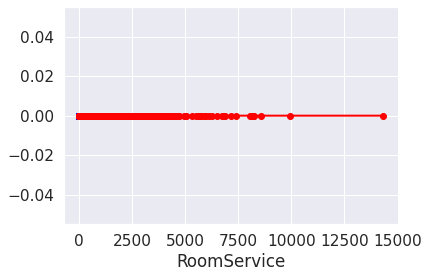

In [41]:
plt.plot(df_transported['RoomService'], np.zeros_like(df_transported['RoomService']), marker = 'x', color = 'blue')
plt.plot(df_not_transported['RoomService'], np.zeros_like(df_not_transported['RoomService']), marker = 'o', color = 'red')
plt.xlabel('RoomService')
plt.show()

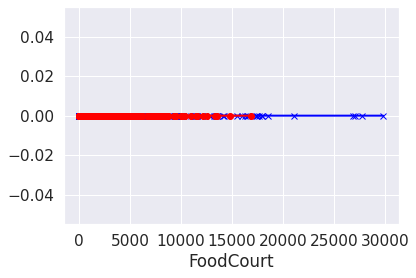

In [42]:
plt.plot(df_transported['FoodCourt'], np.zeros_like(df_transported['FoodCourt']), marker = 'x', color = 'blue')
plt.plot(df_not_transported['FoodCourt'], np.zeros_like(df_not_transported['FoodCourt']), marker = 'o', color = 'red')
plt.xlabel('FoodCourt')
plt.show()

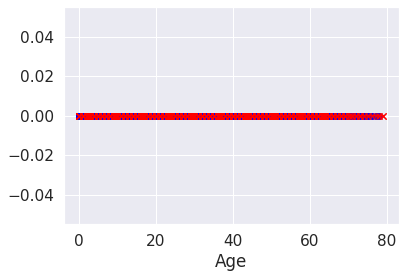

In [43]:
plt.plot(df_transported['Age'], np.zeros_like(df_transported['Age']), marker = 'o', color = 'blue')
plt.plot(df_not_transported['Age'], np.zeros_like(df_not_transported['Age']), marker = 'x', color = 'red')
plt.xlabel('Age')
plt.show()

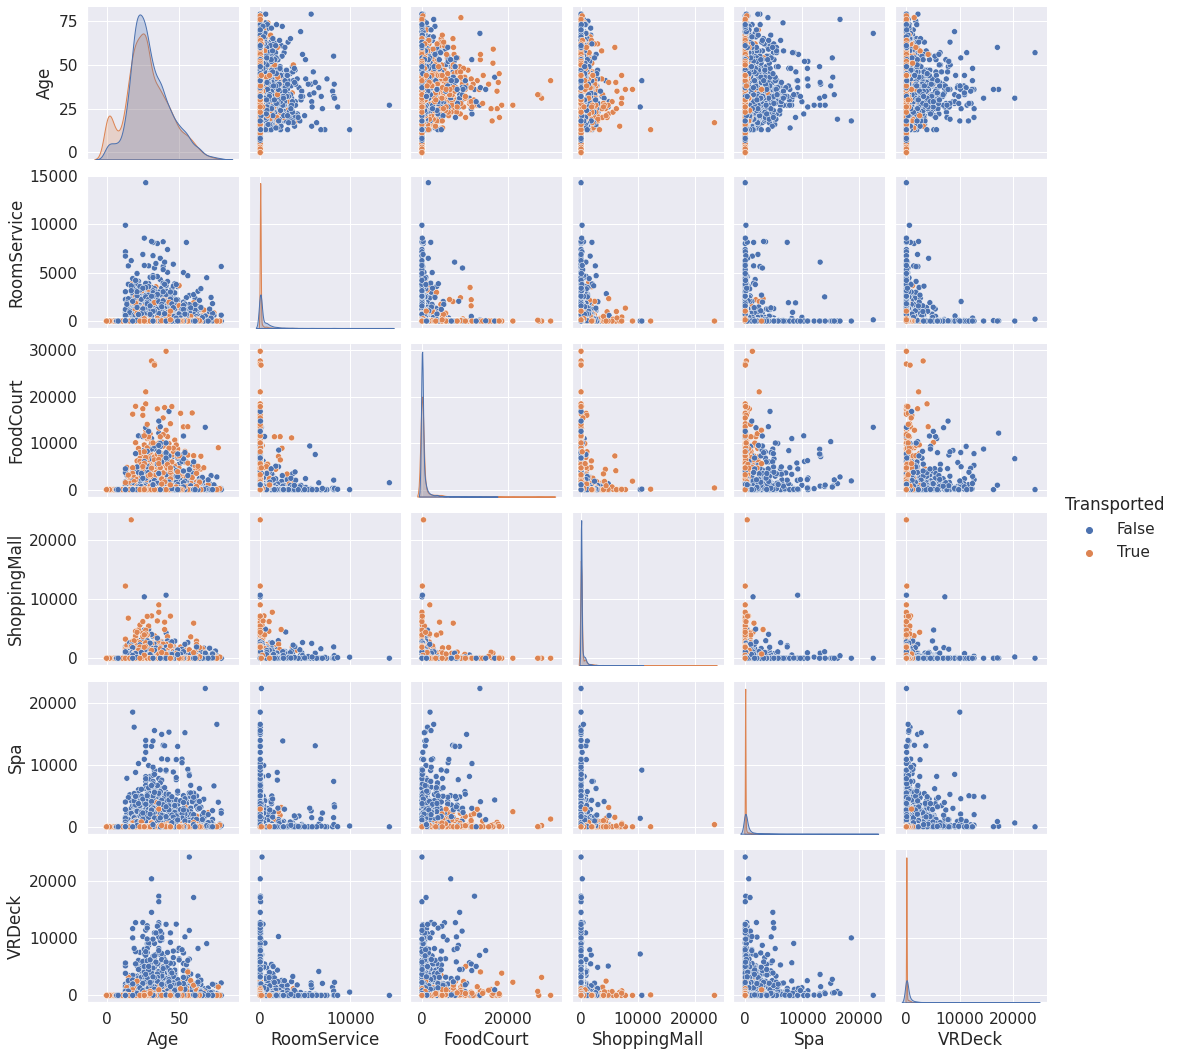

In [44]:
#Multivariate Analysis
sns.pairplot(df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']], hue = 'Transported')
sns.set(style='darkgrid', font_scale=1.4)

In [45]:
#Dropping duplicates
duplicate = df[df.duplicated()]
print('Duplicate Rows:'+str(len(duplicate)))

Duplicate Rows:2812


In [46]:
df = df.drop_duplicates()

In [47]:
duplicate = df[df.duplicated()]
print('Duplicate rows:'+str(len(duplicate)))

Duplicate rows:0


In [48]:
#Getting information of people likely to be transported from age brackets
df['Age_group']=np.nan
df.loc[df['Age']<=12,'Age_group']='Age_0-12'
df.loc[(df['Age']>12) & (df['Age']<18),'Age_group']='Age_13-17'
df.loc[(df['Age']>=18) & (df['Age']<=25),'Age_group']='Age_18-25'
df.loc[(df['Age']>25) & (df['Age']<=30),'Age_group']='Age_26-30'
df.loc[(df['Age']>30) & (df['Age']<=50),'Age_group']='Age_31-50'
df.loc[df['Age']>50,'Age_group']='Age_51+'

# New features - test set
test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0-12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13-17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18-25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26-30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31-50'
test.loc[test['Age']>50,'Age_group']='Age_51+'


Text(0.5, 1.0, 'Age group distribution')

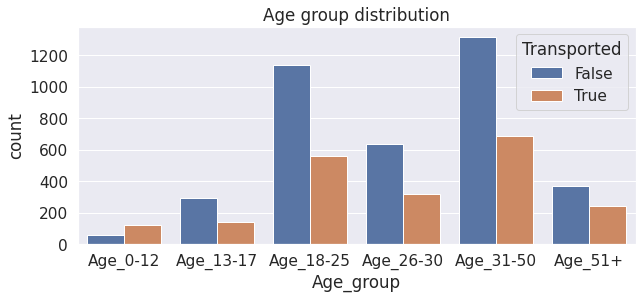

In [49]:
# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=df, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
g = sns.set(style='darkgrid', font_scale=1.4)
plt.title('Age group distribution')

In [50]:
#Converting categorical data to numeric by encoding
df['VIP'] = df['VIP'].astype('category')
df['HomePlanet'] = df['HomePlanet'].astype('category')
df['CryoSleep'] = df['CryoSleep'].astype('category')
df['Destination'] = df['Destination'].astype('category')
df['Transported'] = df['Transported'].astype('category')

df['VIP'] = df['VIP'].cat.codes
df['HomePlanet'] = df['HomePlanet'].cat.codes
df['CryoSleep'] = df['CryoSleep'].cat.codes
df['Destination'] = df['Destination'].cat.codes
df['Transported'] = df['Transported'].cat.codes

In [51]:
df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,Age_31-50
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,Age_18-25
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,Age_51+


In [52]:
df = df.drop('Age_group', axis = 'columns')
df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0


In [53]:
#Converting categorical data to numeric by encoding
test['VIP'] = test['VIP'].astype('category')
test['HomePlanet'] = test['HomePlanet'].astype('category')
test['CryoSleep'] = test['CryoSleep'].astype('category')
test['Destination'] = test['Destination'].astype('category')

test['VIP'] = test['VIP'].cat.codes
test['HomePlanet'] = test['HomePlanet'].cat.codes
test['CryoSleep'] = test['CryoSleep'].cat.codes
test['Destination'] = test['Destination'].cat.codes

In [54]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_group
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Age_26-30
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Age_18-25
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Age_31-50
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Age_31-50
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Age_18-25


In [55]:
test = test.drop('Age_group', axis = 'columns')
test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Splitting X and Y
features = df.columns[:-1]
X = df[features]
y = df['Transported']

In [57]:
X_test = test[features]

In [58]:
X_mm = df.drop(['Transported'], axis = 'columns')

In [59]:
y_mm = df['Transported']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_val, y_train, y_val = train_test_split(X_mm,y_mm, test_size = 0.3, random_state=32)

In [61]:
len(y_val)

1765

In [62]:
len(x_val)

1765

In [63]:
#Testing a model
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()

In [64]:
gn.fit(x_train,y_train)

GaussianNB()

In [65]:
gn.score(x_val, y_val)

0.658356940509915

In [66]:
#importing model libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
#Finding best model
def find_best_model_using_gridsearchcv(X_mm,y_mm):
    algos = {
        'naive_bayes':{
            'model':GaussianNB(),
            'params':{
                'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,10,20],
                'kernel':['rbf','poly']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators': [50, 100, 150, 200, 250, 300],
                'max_depth': [4, 6, 8, 10, 12]
            }
        },
        'tree':{
            'model':DecisionTreeClassifier(),
            'params':{
                'min_samples_split': [1,5,10]
            }
        },
        'logistic_regression':{
            'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
            'params':{
                'penalty': ['l1','l2'],
                'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5],
                'max_iter': [50, 100, 150]
            }
        }
    }
    scores = []
    for algo_name, rs in algos.items():
        gs = GridSearchCV(rs['model'], rs['params'],cv = 5, return_train_score = False)
        gs.fit(X_mm,y_mm)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns = ['model','best_score', 'best_params'])

In [68]:
find_best_model_using_gridsearchcv(X_mm,y_mm)

,model,best_score,best_params
0,naive_bayes,0.674716,{'var_smoothing': 1e-10}
1,svm,0.774528,"{'C': 20, 'kernel': 'rbf'}"
2,random_forest,0.774185,"{'max_depth': 6, 'n_estimators': 250}"
3,tree,0.688491,{'min_samples_split': 10}
4,logistic_regression,0.766703,"{'C': 0.75, 'max_iter': 50, 'penalty': 'l2'}"


In [69]:
#Using best model
model_cl =SVC(C = 20, kernel = 'rbf')
model_cl.fit(x_train,y_train)

SVC(C=20)

In [70]:
#model score
model_cl.score(x_val,y_val)

0.771671388101983

In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.25, random_state = 0)

In [72]:
#Model score for five splits
cross_val_score(SVC(C = 20, kernel = 'rbf'), X,y, cv=cv)

array([0.77974167, 0.77090415, 0.76274643, 0.78382053, 0.77090415])

In [73]:
#predicting x_val
y_pred = model_cl.predict(x_val)

In [74]:
#Using confusion matrics to get useful information
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

The val accuracy of the test model is 0.771671388101983




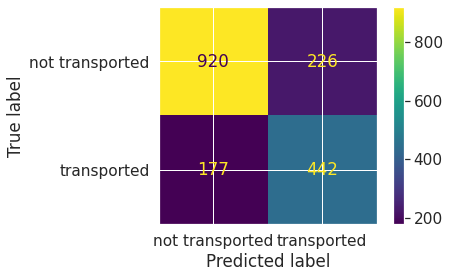

In [75]:
cm = confusion_matrix(y_val, y_pred)
cm_plot_labels = ['not transported','transported']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cm_plot_labels)


print("The val accuracy of the test model is "+str((cm[0][0]+cm[1][1])/y_val.shape[0]))
print("\n")
disp = disp.plot()
plt.show()

In [76]:
#Using out model to predict transported people for our test data sets
model_cl.predict(test)

array([1, 0, 1, ..., 1, 1, 1], dtype=int8)

In [77]:
transported = model_cl.predict(test)

In [78]:
test['Transported'] =transported

In [79]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,1


In [80]:
#Achieving Submission requirement
sub['Transported'] = transported.astype('bool')

In [81]:
sub.to_csv("submission.csv",index=False)
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [82]:
#The End
sub.shape

(4277, 2)